In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA (Cleaning, Visualisation, Analysis and Feature Engineering)

## 1.1. Pre-load the Data Dictionary File here for easy reference...

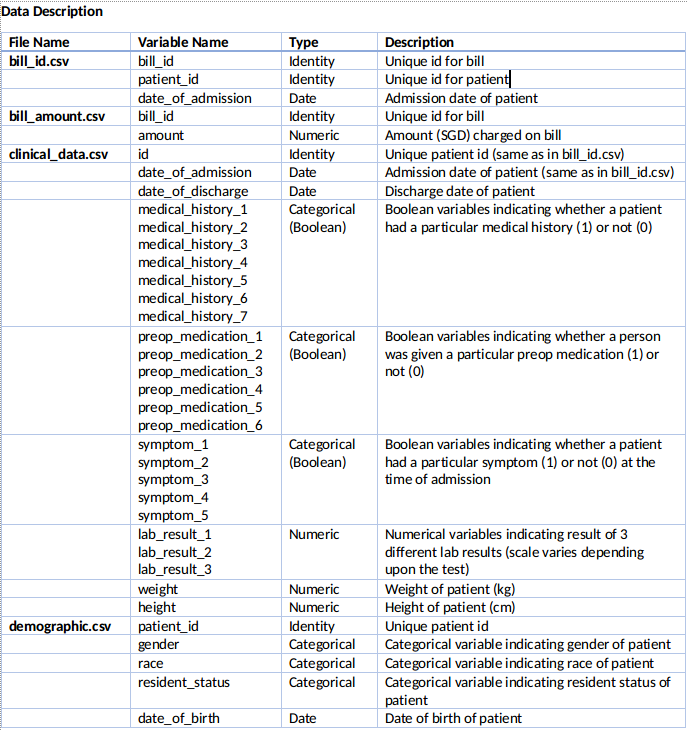

## 1.2. Load the Datasets
### bill, billing amount, clinical records and patient demographics

In [2]:
df_bill = pd.read_csv('bill_id.csv')
df_bill_amount = pd.read_csv('bill_amount.csv')

df_clinical = pd.read_csv('clinical_data.csv')
df_demographic = pd.read_csv('demographics.csv')

In [3]:
# Check the Dimensions for all the datasets
df_bill.shape, df_bill_amount.shape, df_clinical.shape, df_demographic.shape

((13600, 3), (13600, 2), (3400, 26), (3000, 5))

In [4]:
# Bill and Bill amount have same number of records
# Check for uniqueness
df_bill['patient_id'].nunique(), df_bill_amount['bill_id'].nunique()

(3000, 13600)

In [5]:
# Check for uniqueness
df_clinical['id'].nunique(), df_demographic['patient_id'].nunique()

(3000, 3000)

### 1.2.1 Bill

In [6]:
df_bill.sample(5, random_state=1)

,bill_id,patient_id,date_of_admission
804,5235258272,ff727bbb751f38bceedaf6f6963ece23,2011-04-21
11857,2656356690,92bcc6d8ecbb238e1240a6bdfec58cfe,2015-05-18
1851,3573667854,94394b3a8b53b5096a0e7b2c4514d450,2011-09-10
11890,5352869179,97e30fdf6bd3f8bac9b0a0087a25d172,2015-05-25
8955,8586966649,b1e8ed2ba3683648e9b506756d33d86f,2014-04-17


In [7]:
# Check for null values in all columns
df_bill.isnull().sum()

bill_id              0
patient_id           0
date_of_admission    0
dtype: int64

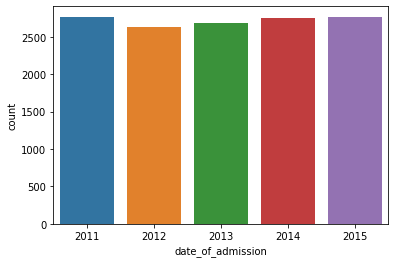

In [8]:
# Plot to quickly see all values and count
fig = plt.plot(figsize = (15, 10))
sns.countplot(x=pd.DatetimeIndex(df_bill['date_of_admission']).year, data=df_bill)

### 1.2.2 Bill Amount

In [9]:
df_bill_amount.sample(5, random_state=1)

,bill_id,amount
804,5437699054,1447.090262
11857,3802505264,583.417477
1851,141991175,831.885666
11890,2526352816,1067.098981
8955,4169756098,1361.288360


In [10]:
# Check for null values in all columns
df_bill_amount.isnull().sum()

bill_id    0
amount     0
dtype: int64

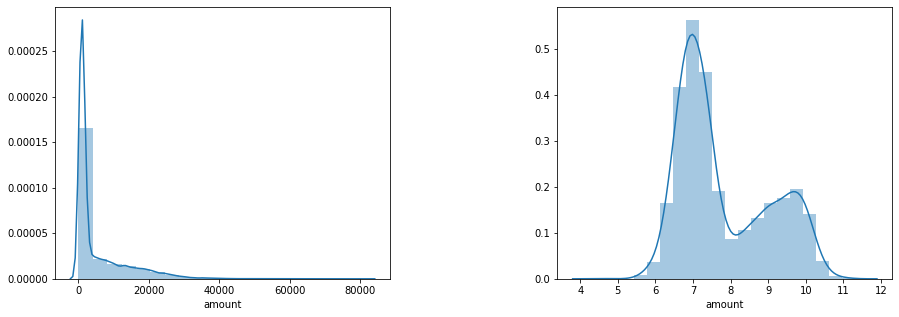

In [11]:
# Plot the Distribution of the Amount and check for invalid values
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

# Scale the Values in Log to see the distribution clearly
sns.distplot(df_bill_amount['amount'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(np.log(df_bill_amount['amount']), bins=20, kde=True, ax=ax[0][1])

In [12]:
# Check the Statistical Analysis
df_bill_amount.describe(include='all')

,bill_id,amount
count,1.360000e+04,13600.000000
mean,5.007147e+09,5464.767783
std,2.885919e+09,7717.479509
min,5.584120e+05,79.496707
25%,2.485853e+09,950.689008
50%,4.992958e+09,1516.951136
75%,7.524563e+09,7307.056573
max,9.999633e+09,81849.751340


In [13]:
df_bill_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
bill_id    13600 non-null int64
amount     13600 non-null float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [14]:
# Combine Bill and Bill Amount (aggregated for each patient id and take the last admission date)
df_bill_agg = df_bill.set_index('bill_id').join(df_bill_amount.set_index('bill_id')).reset_index()
df_bill_agg.sample(10)

,bill_id,patient_id,date_of_admission,amount
8742,3028203026,c26efacee3e39944e6a61e67b0d9cea1,2014-03-20,8813.516312
10694,655031301,2ec7ec605b91e481e3dd4f03684ff954,2014-12-11,1501.545643
872,3328557200,c1794117c0444334a3f907744153d656,2011-05-03,19600.799102
7883,4554648305,2d72b86ce75e2de4b712d989b8bbe29f,2013-12-02,1184.935307
784,9978280764,7012168741aaa5a4d3f2b14527ef5de1,2011-04-18,944.772879
8899,4049474863,c10ef2df963aaa648a93940d81b6d4e5,2014-04-13,8493.255051
3420,842400248,2e14e5fa058673fbdb4e525403be304a,2012-04-02,8891.214452
4678,5218623101,f27c4e7587c5ed6765fccf390484cdd4,2012-09-21,1075.873029
9045,1220436605,89b1575741054259636bf35350ed49c5,2014-05-02,848.086388
2470,9199697277,10c2eab3ad4d04df28ee89588b85d962,2011-11-17,1200.953940


In [15]:
# Aggregate the Amount by Patient ID and Take only the latest date of admission
# Amount is the Target Variable, Engineer the Min, Max, Mean and Sum to have multiple targets
# I find that this is more useful instead of just having 1 target variable
df_bill_agg = df_bill_agg.groupby('patient_id').aggregate({'date_of_admission': 'max', 'amount': ['min', 'max', 'mean', 'sum']}).reset_index()
df_bill_agg.columns = df_bill_agg.columns.map('_'.join)

In [16]:
# View sample records, this dataframe will be combined with the clinical data after cleaning and aggregation
df_bill_agg.sample(10)

,patient_id_,date_of_admission_max,amount_min,amount_max,amount_mean,amount_sum
1049,58fb4b3ad4b044e97eaa0e6d9c3cb37f,2012-01-13,628.183581,18522.504719,5149.687719,20598.750875
2019,ae5530a383321f9a3986f333b44a85c4,2012-10-05,907.550246,5707.202060,2204.321170,8817.284682
466,266e4e6cab66ea649c6baaa0b0fff2e7,2013-01-11,855.239495,19720.096925,5895.634004,23582.536015
358,1d231c1bb04fd75579a139c4496b436c,2013-01-15,1141.361631,8696.178855,4195.991573,16783.966291
312,192c9218f606e6d01ce97ab74f5347c3,2012-01-06,1315.141950,4243.922444,2659.383200,10637.532801
2203,bd97618d046cd9286f9dbc9f14d2e5c7,2013-05-19,1394.479558,14435.355309,4765.245447,19060.981789
2742,ea4f259bc46b6818f55b774abb7ac690,2014-08-09,447.665633,15402.291599,3536.308847,42435.706169
632,34a05abce831dc539d0a06cc18bb235e,2011-11-26,304.897320,9866.570767,3780.679154,15122.716615
1785,9ca72062a5f6b74a36dd7c7bf447dd62,2012-03-12,440.069907,16524.089469,3847.304481,30778.435845
62,05623c5ebcdc7254603430ca0206c35d,2012-01-09,646.396764,16262.662370,4676.710008,18706.840031


### NOTES:
- having 4 target variables will give flexibility in the prediction and I think this is useful for patients and insurance industries to serve as a benchmark
- min amount gives indication the lowest bracket for a one time clinical appointment cost given the conditions and medications
- mean amount gives indication of overall average for patients with multiple visits, helps to prepare financially and for insurance industries with multiple claims
- max amount gives the worse case scenario overall
- amount sum, it is useful but highly dependent on the number of clinical appointments

All these can be considered later for modeling as an important feature

### 1.2.3 Clinical Records

In [17]:
df_clinical.sample(5, random_state=1)

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
605,6af0cf21feff53afbf51fe896167e1dd,2011-11-12,2011-11-23,0,1.0,0,0,0.0,0,1,...,1,1,1,1,0,14.9,27.8,102.0,70.2,160.0
3359,ce90c139c70bc6ede290a999bf413a2b,2015-12-03,2015-12-16,0,1.0,No,0,0.0,0,0,...,0,0,1,1,0,15.2,26.3,117.0,85.4,165.0
2440,3dacd463852675c5dbb38f4bdc2e7322,2014-07-21,2014-08-07,1,0.0,0,0,0.0,0,0,...,1,1,0,1,1,12.6,27.2,84.0,86.3,160.0
1661,e711730a0e42ae105273d5c669b194f5,2013-06-17,2013-06-26,0,0.0,0,0,0.0,0,0,...,1,1,1,0,0,16.9,28.5,80.0,73.0,166.0
3312,85b49f9bb476f4f694f996c394ed5ea9,2015-11-12,2015-11-21,0,1.0,1,0,1.0,0,0,...,0,1,1,1,1,16.2,28.0,113.0,101.0,174.0


In [18]:
# Check if the Columns are in their proper data types, check individually
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
id                    3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null object
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4             3400 non-null int64
symptom_5             3400 non-null int64
lab

In [19]:
# Check for null values in all columns
df_clinical.isnull().sum()

id                      0
date_of_admission       0
date_of_discharge       0
medical_history_1       0
medical_history_2     233
medical_history_3       0
medical_history_4       0
medical_history_5     304
medical_history_6       0
medical_history_7       0
preop_medication_1      0
preop_medication_2      0
preop_medication_3      0
preop_medication_4      0
preop_medication_5      0
preop_medication_6      0
symptom_1               0
symptom_2               0
symptom_3               0
symptom_4               0
symptom_5               0
lab_result_1            0
lab_result_2            0
lab_result_3            0
weight                  0
height                  0
dtype: int64

(0.0, 1.0, 0.0, 1.0)

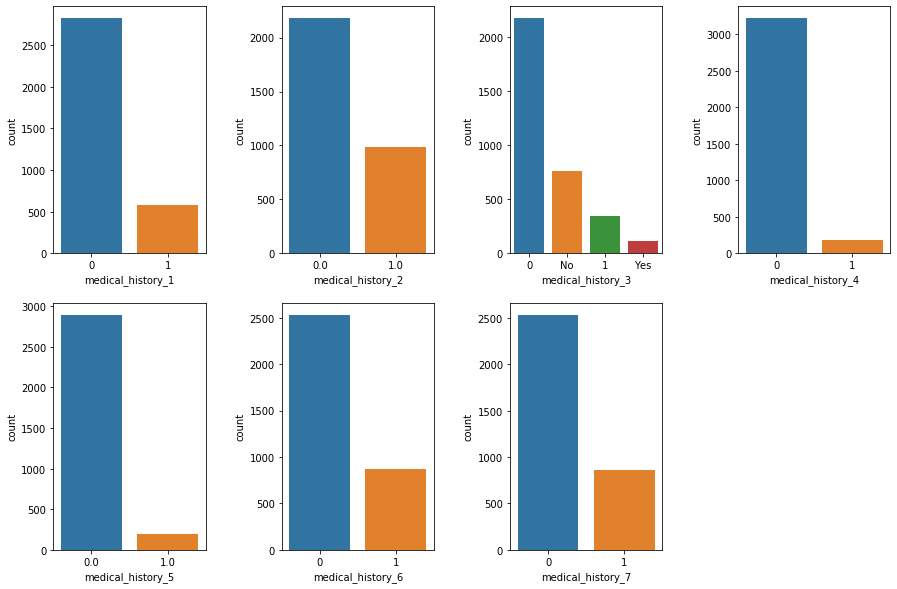

In [20]:
# Medical Data
fig, ax = plt.subplots(2, 4, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='medical_history_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='medical_history_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='medical_history_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='medical_history_4', data=df_clinical, ax=ax[0][3])
sns.countplot(x='medical_history_5', data=df_clinical, ax=ax[1][0])
sns.countplot(x='medical_history_6', data=df_clinical, ax=ax[1][1])
sns.countplot(x='medical_history_7', data=df_clinical, ax=ax[1][2])
ax[-1, -1].axis('off')

In [21]:
# Perform some Data Correction...
# Need to change 0.0 to 0, 1.0 to 1 and fill all null values
df_clinical['medical_history_2'].fillna(value=0)
df_clinical['medical_history_2'] = np.where(df_clinical['medical_history_2'] == 0.0, 0, 1)
df_clinical['medical_history_5'].fillna(value=0)
df_clinical['medical_history_5'] = np.where(df_clinical['medical_history_5'] == 0.0, 0, 1)

# Need to change No to 0, Yes to 1
df_clinical['medical_history_3'].replace(['Yes', 'No'], [1, 0], inplace=True)
df_clinical['medical_history_3'] = df_clinical['medical_history_3'].astype(int)

(0.0, 1.0, 0.0, 1.0)

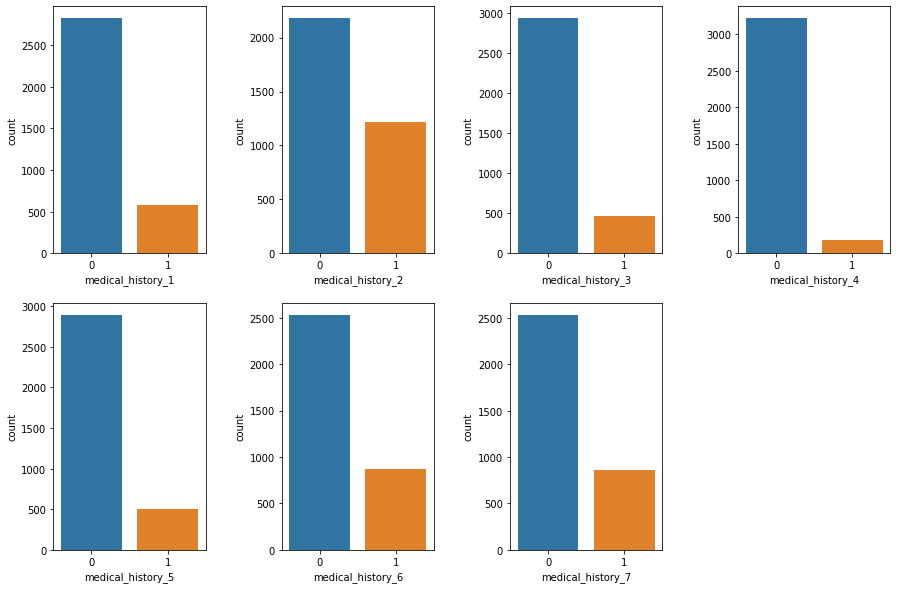

In [22]:
# Display the Corrected Medical Data
fig, ax = plt.subplots(2, 4, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='medical_history_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='medical_history_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='medical_history_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='medical_history_4', data=df_clinical, ax=ax[0][3])
sns.countplot(x='medical_history_5', data=df_clinical, ax=ax[1][0])
sns.countplot(x='medical_history_6', data=df_clinical, ax=ax[1][1])
sns.countplot(x='medical_history_7', data=df_clinical, ax=ax[1][2])
ax[-1, -1].axis('off')

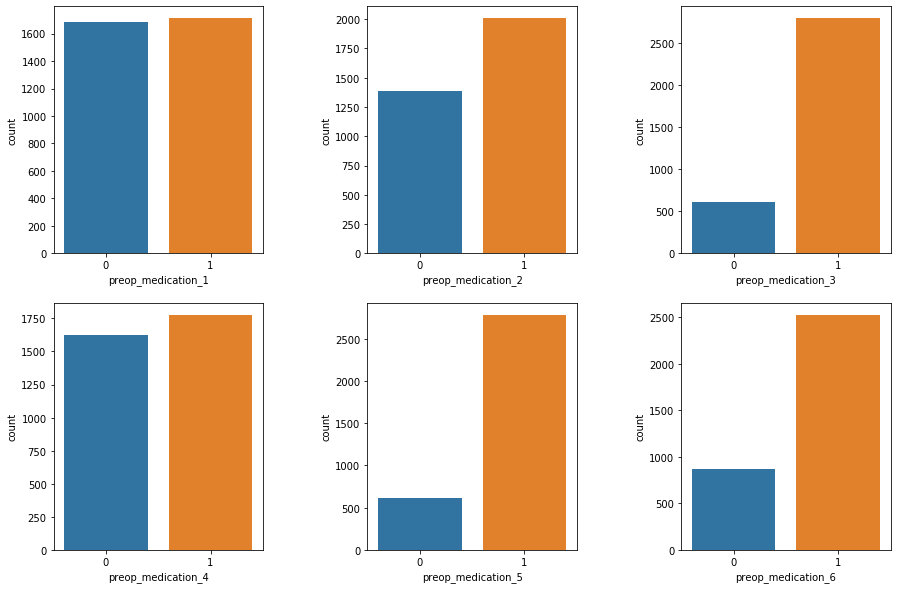

In [23]:
# PreOp Medication
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='preop_medication_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='preop_medication_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='preop_medication_3', data=df_clinical, ax=ax[0][2])
sns.countplot(x='preop_medication_4', data=df_clinical, ax=ax[1][0])
sns.countplot(x='preop_medication_5', data=df_clinical, ax=ax[1][1])
sns.countplot(x='preop_medication_6', data=df_clinical, ax=ax[1][2])

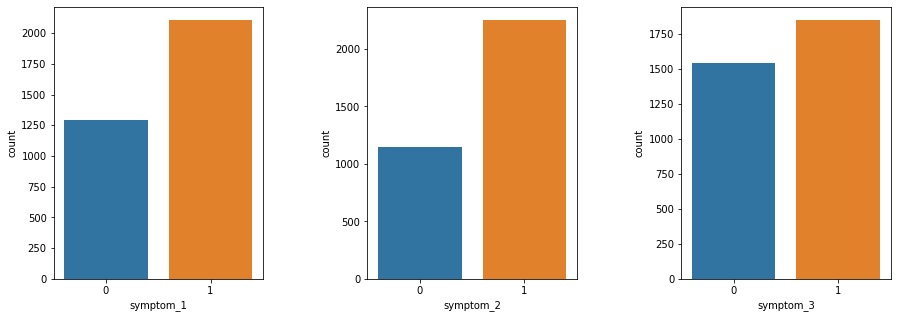

In [24]:
# Symptoms
fig, ax = plt.subplots(1, 3, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='symptom_1', data=df_clinical, ax=ax[0][0])
sns.countplot(x='symptom_2', data=df_clinical, ax=ax[0][1])
sns.countplot(x='symptom_3', data=df_clinical, ax=ax[0][2])

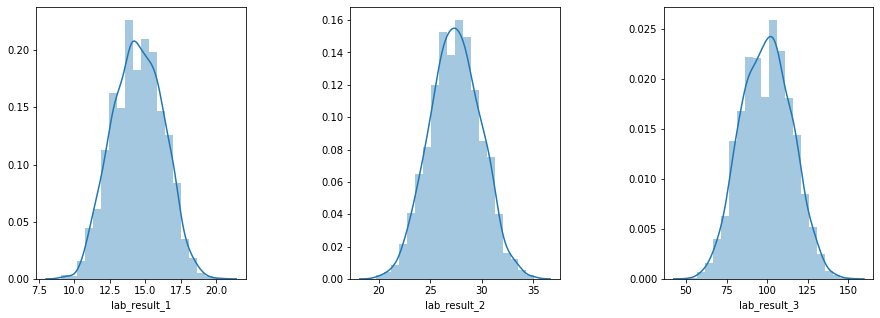

In [25]:
# Lab Results
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 3, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)
sns.distplot(df_clinical['lab_result_1'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(df_clinical['lab_result_2'], bins=20, kde=True, ax=ax[0][1])
sns.distplot(df_clinical['lab_result_3'], bins=20, kde=True, ax=ax[0][2])

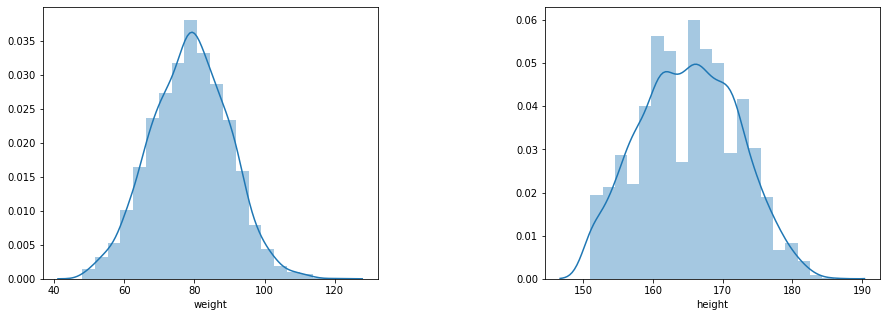

In [26]:
# Weight and Height
# Check for Invalid Values (negative, 0, or overly large values)
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)
sns.distplot(df_clinical['weight'], bins=20, kde=True, ax=ax[0][0])
sns.distplot(df_clinical['height'], bins=20, kde=True, ax=ax[0][1])

In [27]:
# For Clinical Data, need to inspect if this is just one record per patient or multiple records per patient
# this information will be used later when joining the tables
df_clinical['id'].nunique(), df_clinical['id'].count()

(3000, 3400)

In [28]:
# Clinical Data seems to have a one to many mapping, need to check the dates of admission or discharge
df_clinical_grouped = df_clinical.groupby(['id'])[['date_of_discharge']].agg('count').reset_index()
df_clinical_grouped_cond = df_clinical_grouped['date_of_discharge'] > 1
df_clinical_grouped[df_clinical_grouped_cond].sample(3)

,id,date_of_discharge
562,2e1657639bfa3ff5d6787fea89461281,2
117,099b891b7fbb27b3f73b98a6a5c73e6d,2
1086,5c96604e0c59824c125c8d9c899facb1,2


### Sample Records...
1392260eb56ee15bf08b3343c11f16e4, c237b1af83870ddcb5c74a42f23a1131, fdf8e5d36473c09a2700bbceee7196ab

In [29]:
# Check the sampled data 1 and see the difference
df_clinical[df_clinical['id'] == '1392260eb56ee15bf08b3343c11f16e4']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
129,1392260eb56ee15bf08b3343c11f16e4,2011-03-12,2011-03-26,1,0,1,0,0,0,1,...,1,1,1,1,0,16.2,27.8,83.0,81.2,166.0
559,1392260eb56ee15bf08b3343c11f16e4,2011-10-18,2011-10-30,0,1,0,0,1,0,0,...,1,0,1,1,1,14.2,25.2,92.0,82.2,166.0


In [30]:
# Check the sampled data 2 and see the difference
df_clinical[df_clinical['id'] == 'c237b1af83870ddcb5c74a42f23a1131']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
417,c237b1af83870ddcb5c74a42f23a1131,2011-08-13,2011-08-21,1,0,0,0,0,0,1,...,1,1,1,1,0,14.8,25.4,90.0,91.6,154.0
438,c237b1af83870ddcb5c74a42f23a1131,2011-08-25,2011-09-03,0,1,0,0,0,0,0,...,1,1,0,0,1,14.9,27.5,115.0,92.6,154.0


In [31]:
# Check the sampled data 3 and see the difference
df_clinical[df_clinical['id'] == 'fdf8e5d36473c09a2700bbceee7196ab']

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
857,fdf8e5d36473c09a2700bbceee7196ab,2012-04-07,2012-04-13,1,1,0,0,0,1,0,...,1,0,1,1,1,17.3,28.4,108.0,66.4,173.0
2886,fdf8e5d36473c09a2700bbceee7196ab,2015-04-07,2015-04-20,0,1,0,0,0,0,0,...,1,1,0,1,1,13.0,24.8,88.0,61.4,173.0


In [32]:
df_clinical.columns

Index(['id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height'],
      dtype='object')

In [33]:
# Count the length of the entire admission in days (Admission - Discharge)
df_clinical['days_of_admission'] = (pd.DatetimeIndex(df_clinical['date_of_discharge']) - pd.DatetimeIndex(df_clinical['date_of_admission'])).days

In [34]:
# Aggregate the Amount by Patient ID and Take only the latest date of admission
# Assumptions:
# - if person has medical history at anytime, consider worst case scenario
# - same for preop and symptom
# - for lab result and weight, take the min, max and mean
# - height does not change unless person lose a limb
df_clinical_agg = df_clinical.groupby('id').aggregate({'date_of_admission' : ['max', 'count'], 
                                                       'date_of_discharge' : 'max',
                                                       'days_of_admission' : ['min', 'max', 'mean'],
                                                       'medical_history_1' : 'max',
                                                       'medical_history_2' : 'max',
                                                       'medical_history_3' : 'max',
                                                       'medical_history_4' : 'max',
                                                       'medical_history_5' : 'max',
                                                       'medical_history_6' : 'max',
                                                       'medical_history_7' : 'max',
                                                       'preop_medication_1' : 'max',
                                                       'preop_medication_2' : 'max',
                                                       'preop_medication_3' : 'max',
                                                       'preop_medication_4' : 'max',
                                                       'preop_medication_5' : 'max',
                                                       'preop_medication_6' : 'max',
                                                       'symptom_1' : 'max',
                                                       'symptom_2' : 'max',
                                                       'symptom_3' : 'max',
                                                       'symptom_4' : 'max',
                                                       'symptom_5' : 'max',
                                                       'lab_result_1' : ['min', 'max', 'mean'],
                                                       'lab_result_2' : ['min', 'max', 'mean'],
                                                       'lab_result_3' : ['min', 'max', 'mean'],
                                                       'weight' : ['min', 'max', 'mean'],
                                                       'height' : 'mean'
                                                      }).reset_index()
df_clinical_agg.columns = df_clinical_agg.columns.map('_'.join)
df_clinical_agg.sample(10)

,id_,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
2895,f787cc232f57c4b861c94e4da82ada70,2011-08-21,1,2011-09-06,16,16,16.0,0,0,0,...,29.2,29.2,29.2,108.0,108.0,108.0,92.2,92.2,92.2,161.0
1940,a89d10913aae1d07b8487f48b42fc399,2014-02-11,1,2014-02-27,16,16,16.0,0,1,0,...,29.3,29.3,29.3,103.0,103.0,103.0,74.2,74.2,74.2,151.0
1597,8bafca0a50d26098527993cb061c46c6,2014-07-02,1,2014-07-17,15,15,15.0,0,1,0,...,30.8,30.8,30.8,87.0,87.0,87.0,85.9,85.9,85.9,171.0
1922,a75d77844a1292f18e2d3a1da663e9b9,2011-06-09,1,2011-06-23,14,14,14.0,0,0,0,...,23.2,23.2,23.2,83.0,83.0,83.0,68.6,68.6,68.6,165.0
2676,e4e0c062a72e16fb6e4202b61ae9e0ff,2015-06-01,1,2015-06-09,8,8,8.0,0,0,0,...,29.6,29.6,29.6,100.0,100.0,100.0,56.3,56.3,56.3,163.0
2745,eaa3412020fde911404998278d114fcc,2014-03-02,1,2014-03-13,11,11,11.0,0,1,0,...,26.9,26.9,26.9,114.0,114.0,114.0,89.8,89.8,89.8,177.0
2135,b7b6c2dd8974d515b9f0f9f6d9569e71,2014-12-03,1,2014-12-13,10,10,10.0,0,0,0,...,25.6,25.6,25.6,96.0,96.0,96.0,75.3,75.3,75.3,166.0
954,507146bde02748a71ba5cee4f3553e81,2011-09-05,1,2011-09-14,9,9,9.0,0,1,0,...,25.8,25.8,25.8,84.0,84.0,84.0,58.3,58.3,58.3,163.0
2946,fb8a2793b1c896fd57ee13dbafa113ec,2015-10-28,2,2015-11-03,6,8,7.0,1,1,1,...,28.0,30.2,29.1,100.0,106.0,103.0,59.0,59.0,59.0,163.0
614,332ff2662a830bf7465794d70f593fca,2012-10-14,1,2012-10-28,14,14,14.0,0,0,0,...,26.0,26.0,26.0,91.0,91.0,91.0,93.8,93.8,93.8,154.0


### NOTES:
- some patients have more than 1 clinical history
- for the dates of discharge and admission, keep only the latest one
- history, preop and lab, take the max value even if the change is from 1 to 0 (this means to take the cautious approach, any record before will be treated as possible risk
- count the number of records per patient as additional feature
- numerical values, aggregate and get the min, max and mean as additional features

All these can be considered later for modeling as an important feature

### 1.2.4 Patient Demographics

In [35]:
df_demographic.sample(5, random_state=1)

,patient_id,gender,race,resident_status,date_of_birth
1957,76cd00e8fbeb78e79c5dc75a87490396,Female,Malay,Singaporean,1941-05-16
2087,cd0c51b3087df84b452ce04d22782221,Female,Chinese,Singapore citizen,1982-11-11
1394,2895307c38757b4d414d972b24cfca13,Female,Chinese,PR,1974-01-21
1520,0ecc7419ab7f39bce423e340f801335f,Female,Malay,Singapore citizen,1948-08-20
1098,7b14d89c63290dbb05e1ad90e01c3d45,Female,Chinese,Singaporean,1983-02-18


In [36]:
# For Demographic Data, need to inspect if this is just one record per patient or multiple records per patient
# this information will be used later when joining the tables
df_demographic['patient_id'].nunique(), df_demographic['patient_id'].count()

(3000, 3000)

In [37]:
# Add new feature by extracting the year of birth
# Age can be settled later after all the datasets have been combined
df_demographic['year_of_birth'] = pd.DatetimeIndex(df_demographic['date_of_birth']).year

Text(0.5, 1.0, 'Year of Birth Distribution')

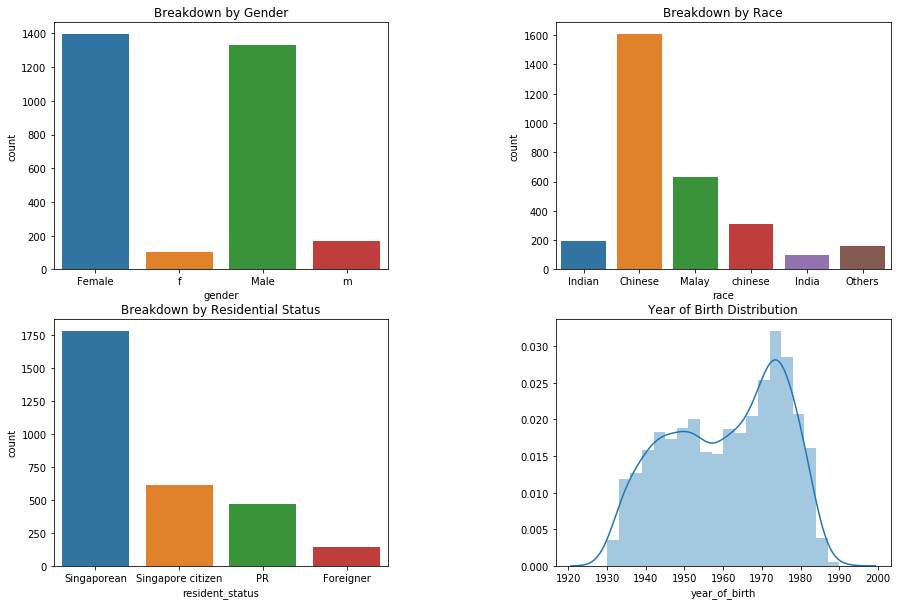

In [38]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='gender', data=df_demographic, ax=ax[0][0])
ax[0][0].set_title('Breakdown by Gender')

sns.countplot(x='race', data=df_demographic, ax=ax[0][1])
ax[0][1].set_title('Breakdown by Race')

sns.countplot(x='resident_status', data=df_demographic, ax=ax[1][0])
ax[1][0].set_title('Breakdown by Residential Status')

sns.distplot(df_demographic['year_of_birth'], bins=20, kde=True, ax=ax[1][1])
ax[1][1].set_title('Year of Birth Distribution')

In [39]:
# Perform some Data Correction...
# Need to change f to Female, m to Male
df_demographic['gender'].replace(['m', 'f'], ['Male', 'Female'], inplace=True)

# Need to change Singapore citizen to Singaporean
df_demographic['resident_status'].replace(['Singapore citizen'], ['Singaporean'], inplace=True)

# Need to change chinese to Chinese and India to Indian
df_demographic['race'].replace(['India', 'chinese'], ['Indian', 'Chinese'], inplace=True)

Text(0.5, 1.0, 'Year of Birth Distribution')

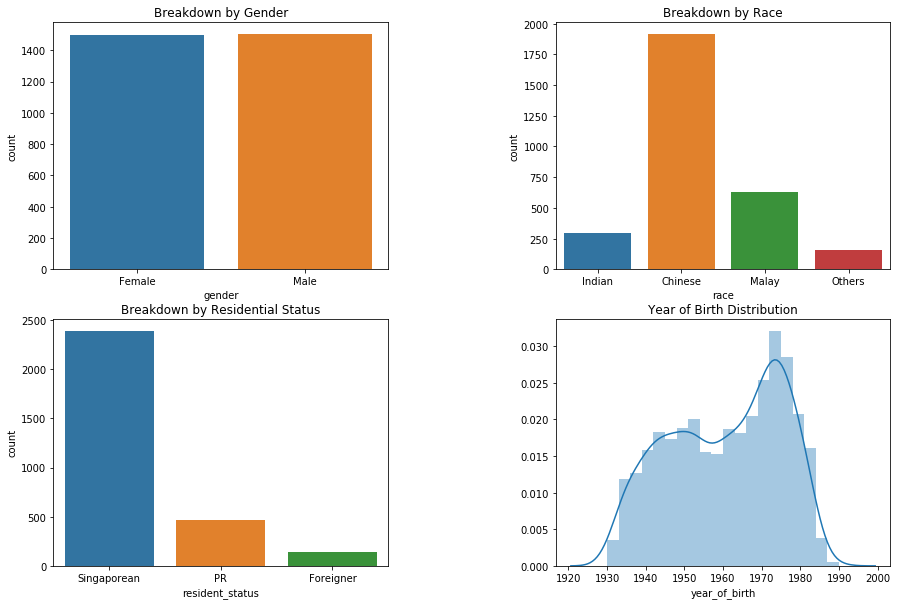

In [40]:
# Display the corrected data
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.subplots_adjust(wspace=0.5)

sns.countplot(x='gender', data=df_demographic, ax=ax[0][0])
ax[0][0].set_title('Breakdown by Gender')

sns.countplot(x='race', data=df_demographic, ax=ax[0][1])
ax[0][1].set_title('Breakdown by Race')

sns.countplot(x='resident_status', data=df_demographic, ax=ax[1][0])
ax[1][0].set_title('Breakdown by Residential Status')

sns.distplot(df_demographic['year_of_birth'], bins=20, kde=True, ax=ax[1][1])
ax[1][1].set_title('Year of Birth Distribution')

### NOTES:
- patient_id can be used to tie all the data together
- create a dataframe that will contain the joined tables together before performing further analysis
- age can be calculated from date of birth to the latest clinical record of admission date

## 1.3. Combine the Datasets into a Super Dataframe

### 1.3.1. Preview the Aggregated Data and Adjust Column names for join

In [41]:
# Update the columns for join later
df_bill_agg.columns = ['patient_id', 'date_of_admission_max', 'amount_min', 'amount_max',
       'amount_mean', 'amount_sum']

In [42]:
# Billing Aggregate
df_bill_agg.sample(5)

,patient_id,date_of_admission_max,amount_min,amount_max,amount_mean,amount_sum
2410,ce7d1bc435701904011862458885ab83,2011-11-15,703.094866,15152.502083,4606.103127,18424.412506
2451,d1c46756852c46bc88820f781738fe3d,2012-03-01,736.279724,7834.869918,2725.899610,10903.598441
1313,71b9a9f97a4e4d64a1a96877df4d548b,2015-03-09,786.996591,53497.475811,15246.557417,121972.459335
719,3bcb72adf02f175119b6cf2df676d422,2015-08-06,750.186673,26527.895884,7550.525015,30202.100060
1263,6d2f516ae9fe90a3c1733ec5405ceb66,2014-04-10,689.870544,24119.880716,6853.559503,27414.238013


In [43]:
# Update the columns for join later
df_clinical_agg.columns = ['patient_id', 'date_of_admission_max', 'date_of_admission_count',
       'date_of_discharge_max', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean']

In [44]:
# Clinical Records Aggregate
df_clinical_agg.sample(5)

,patient_id,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
1126,611914b5fcb758948dc46f7680c57408,2012-05-19,1,2012-05-30,11,11,11.0,0,0,0,...,27.6,27.6,27.6,95.0,95.0,95.0,89.4,89.4,89.4,167.0
1726,969028c04111a11a1171a972dc62e11a,2014-03-16,1,2014-04-01,16,16,16.0,1,0,0,...,25.6,25.6,25.6,112.0,112.0,112.0,68.1,68.1,68.1,171.0
378,1f76d80cc1a1abe93b16257a2694b789,2012-06-05,1,2012-06-19,14,14,14.0,1,0,0,...,27.4,27.4,27.4,98.0,98.0,98.0,98.2,98.2,98.2,160.0
2283,c4de24d8681b297db8a18c53a6b366f1,2012-07-21,1,2012-07-30,9,9,9.0,0,0,0,...,25.0,25.0,25.0,128.0,128.0,128.0,78.9,78.9,78.9,165.0
1843,a1ab1a7fe3ecf85e2c203b1258cade8a,2012-03-28,1,2012-04-08,11,11,11.0,1,1,0,...,29.5,29.5,29.5,104.0,104.0,104.0,89.0,89.0,89.0,154.0


In [45]:
df_demographic.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth
1754,97f1811ff07527b24f25e3a6cd82cde9,Male,Chinese,Singaporean,1952-02-04,1952
1838,ee81dae816f9bcc2632882e6628adf53,Female,Chinese,Singaporean,1962-11-09,1962
2164,867a9256f588a8ea5b349e6b7504774c,Female,Malay,Singaporean,1973-08-01,1973
1208,d0f92506c69ca9e4e75286738d7484d1,Female,Indian,Singaporean,1948-06-17,1948
1409,e6659ee1446f42050108980fa7c70cac,Male,Malay,Singaporean,1939-04-23,1939


### 1.3.2. Join the DataFrames

In [46]:
# Combine all 3 dataframes using patient id as key
df_super = df_demographic.set_index('patient_id').join(df_clinical_agg.set_index('patient_id')).reset_index()
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_2_min,lab_result_2_max,lab_result_2_mean,lab_result_3_min,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean
1730,6d1b7ad0a96572595c814704f3943bc8,Female,Chinese,Singaporean,1968-12-08,1968,2012-10-03,1,2012-10-15,12,...,25.8,25.8,25.8,100.0,100.0,100.0,73.7,73.7,73.7,160.0
938,9b8570a96bbd64564b73b85881a0728e,Male,Indian,PR,1968-10-20,1968,2014-05-24,1,2014-06-05,12,...,26.7,26.7,26.7,104.0,104.0,104.0,96.0,96.0,96.0,174.0
1278,ca5e15ed631b55342605942bb5462c61,Female,Chinese,Singaporean,1945-09-14,1945,2011-03-12,1,2011-03-28,16,...,25.9,25.9,25.9,109.0,109.0,109.0,72.0,72.0,72.0,164.0
1757,b4e7777508489557dc9321241cf6ee9d,Male,Chinese,Singaporean,1962-09-12,1962,2015-06-15,1,2015-06-25,10,...,28.0,28.0,28.0,100.0,100.0,100.0,89.1,89.1,89.1,174.0
946,2276b9a53998c8e4d74408fcc9a744da,Female,Chinese,Singaporean,1967-02-25,1967,2014-02-01,1,2014-02-14,13,...,26.0,26.0,26.0,106.0,106.0,106.0,72.9,72.9,72.9,156.0


In [47]:
df_super = pd.merge(df_super, df_bill_agg, on=['patient_id', 'date_of_admission_max'], how='inner')
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_3_max,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum
579,a71dfdb237d2a567b270b20a17f4aeaf,Male,Malay,Singaporean,1940-08-23,1940,2015-07-12,1,2015-07-24,12,...,88.0,88.0,90.6,90.6,90.6,175.0,1618.173225,41730.054390,12589.994940,50359.979758
2974,e67bf9ab11578cdd96b7c4212a63774f,Female,Indian,Singaporean,1977-10-17,1977,2012-01-09,1,2012-01-25,16,...,91.0,91.0,65.9,65.9,65.9,159.0,562.551142,14548.278987,4281.566403,17126.265614
1846,bcb19be11659249ed817bc17675cc332,Female,Chinese,PR,1979-01-10,1979,2012-06-07,1,2012-06-19,12,...,133.0,133.0,75.2,75.2,75.2,169.0,1044.872548,9195.710678,3260.515836,13042.063343
1471,d7b63036551aa2ffb8a127590416b8b1,Female,Chinese,Singaporean,1970-05-15,1970,2013-10-25,1,2013-11-06,12,...,124.0,124.0,70.2,70.2,70.2,156.0,825.495420,15982.913428,4685.610353,18742.441413
2463,c01660aae6c1da6b4382117303788a33,Female,Chinese,Singaporean,1964-05-24,1964,2014-06-02,1,2014-06-13,11,...,80.0,80.0,66.8,66.8,66.8,157.0,666.660922,11711.126141,3580.606828,14322.427311


### 1.3.3. Additional Feature Engineering (Age of Patient from the Discharge Date)

In [48]:
df_super['age'] = pd.DatetimeIndex(df_super['date_of_admission_max']).year - df_super['year_of_birth']
df_super.sample(5)

,patient_id,gender,race,resident_status,date_of_birth,year_of_birth,date_of_admission_max,date_of_admission_count,date_of_discharge_max,days_of_admission_min,...,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum,age
691,1395e8ff937271feb77e4c487a730f79,Male,Chinese,Singaporean,1938-03-24,1938,2014-12-12,1,2014-12-24,12,...,88.0,98.6,98.6,98.6,166.0,1223.453714,9095.044049,3692.447309,14769.789238,76
1416,eec5c9c926f9fd7b48f2eaef5ffae916,Male,Chinese,PR,1952-10-17,1952,2014-08-12,2,2014-08-26,11,...,100.0,73.0,77.0,75.0,172.0,712.080517,16295.146871,5117.614733,40940.917865,62
2689,3a40e023a7ae9c939475ccc94c67a40e,Female,Chinese,Singaporean,1968-11-23,1968,2012-08-09,2,2012-08-22,13,...,91.5,75.5,78.5,77.0,160.0,618.833257,11702.822792,3514.582868,28116.662942,44
2968,edfaff40b82f24877b23e9b7f7d33531,Male,Chinese,Singaporean,1938-01-04,1938,2011-12-09,1,2011-12-19,10,...,87.0,76.6,76.6,76.6,169.0,1051.261485,8453.996760,3999.346197,15997.384790,73
365,f4c70027be0c9dbf5af67c49959d816a,Male,Chinese,Singaporean,1935-03-27,1935,2014-09-09,1,2014-09-23,14,...,101.0,85.2,85.2,85.2,174.0,475.647245,26913.822532,7465.468096,29861.872386,79


### 1.3.4. Check the Columns and Drop the Unecessary Ones...

In [49]:
df_super.columns

Index(['patient_id', 'gender', 'race', 'resident_status', 'date_of_birth',
       'year_of_birth', 'date_of_admission_max', 'date_of_admission_count',
       'date_of_discharge_max', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_

In [50]:
# Set the Patient ID as the index
df_super = df_super.set_index('patient_id')

In [51]:
# Drop Unecessary Columns
# Dates can be dropped at this point as features related to it such as number of days and age has already been
# engineered
df_super = df_super.drop(columns=['date_of_birth', 'year_of_birth', 'date_of_admission_max', 'date_of_discharge_max'])
df_super.sample(5)

,gender,race,resident_status,date_of_admission_count,days_of_admission_min,days_of_admission_max,days_of_admission_mean,medical_history_1_max,medical_history_2_max,medical_history_3_max,...,lab_result_3_mean,weight_min,weight_max,weight_mean,height_mean,amount_min,amount_max,amount_mean,amount_sum,age
patient_id,,,,,,,,,,,,,,,,,,,,,
a5d81505f99c9b00d1e540b7565d8b99,Female,Chinese,Singaporean,1,8,8,8.0,1,1,0,...,115.0,76.7,76.7,76.7,156.0,995.150872,9044.350899,4011.189188,16044.756750,60
8a0acb8774188eee08ee3107b43e4fa0,Female,Chinese,Singaporean,1,14,14,14.0,0,0,0,...,66.0,79.6,79.6,79.6,159.0,810.078018,22199.385777,6940.187636,27760.750545,56
5b88072f7460109071c92d682508e50d,Male,Chinese,Singaporean,1,13,13,13.0,0,0,0,...,81.0,73.1,73.1,73.1,179.0,564.711607,14009.627437,4150.237467,16600.949869,36
076c10fc3dd576405bd464219112735e,Male,Chinese,PR,1,12,12,12.0,0,1,0,...,95.0,104.5,104.5,104.5,171.0,919.643395,12770.874324,5086.661673,20346.646691,46
f812f46c6bbd5aac53c5cad6241a49f6,Female,Chinese,Singaporean,1,12,12,12.0,1,0,0,...,113.0,84.7,84.7,84.7,151.0,765.511555,9088.586573,4250.227736,17000.910945,60


### 1.3.5. Check the Target Variable Distribution

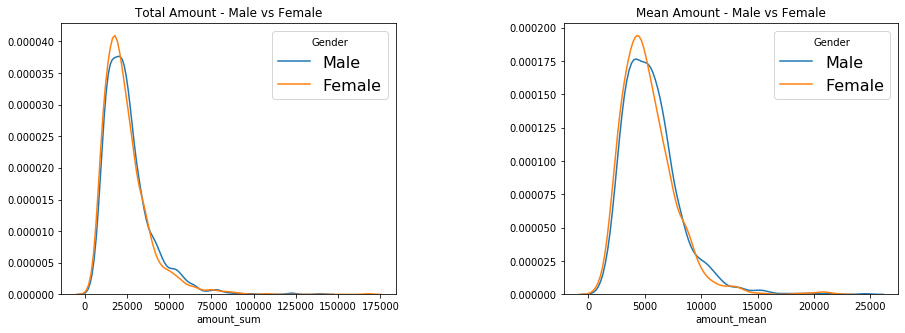

In [52]:
# Check against Gender
fig, ax = plt.subplots(1, 2, figsize = (15, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.distplot(df_super[df_super['gender']=='Male']['amount_sum'], label='Male', bins=20, hist=False, kde=True, ax=ax[0][0])
sns.distplot(df_super[df_super['gender']=='Female']['amount_sum'], label='Female', bins=20, hist=False, kde=True, ax=ax[0][0])
ax[0][0].set_title('Total Amount - Male vs Female')
ax[0][0].legend(prop={'size': 16}, title = 'Gender')

sns.distplot(df_super[df_super['gender']=='Male']['amount_mean'], label='Male', bins=20, hist=False, kde=True, ax=ax[0][1])
sns.distplot(df_super[df_super['gender']=='Female']['amount_mean'], label='Female', bins=20, hist=False, kde=True, ax=ax[0][1])
ax[0][1].set_title('Mean Amount - Male vs Female')
ax[0][1].legend(prop={'size': 16}, title = 'Gender')

### NOTES:
- statistically, females usually have higher medical spending than male
- the graphs also show in terms of total and average amount

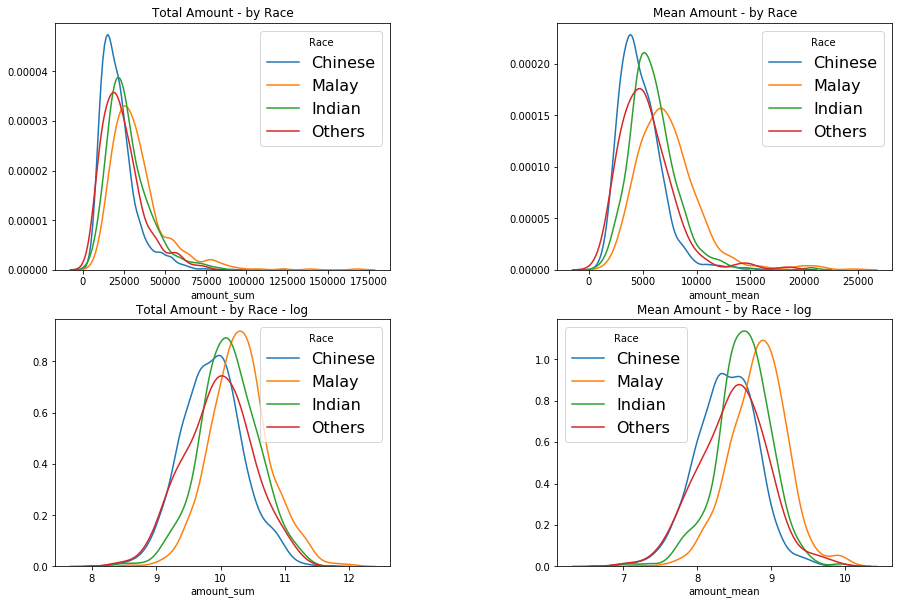

In [53]:
# Check against Race
fig, ax = plt.subplots(2, 2, figsize = (15, 10), squeeze=False)
fig.subplots_adjust(wspace=0.5)

list_race = ['Chinese', 'Malay', 'Indian', 'Others']

# Non-Log Values
for race in list_race:
    sns.distplot(df_super[df_super['race']==race]['amount_sum'], label=race, hist=False, kde=True, ax=ax[0][0])
ax[0][0].set_title('Total Amount - by Race')
ax[0][0].legend(prop={'size': 16}, title = 'Race')

for race in list_race:
    sns.distplot(df_super[df_super['race']==race]['amount_mean'], label=race, hist=False, kde=True, ax=ax[0][1])
ax[0][1].set_title('Mean Amount - by Race')
ax[0][1].legend(prop={'size': 16}, title = 'Race')

# Values in Log Scale
for race in list_race:
    sns.distplot(np.log(df_super[df_super['race']==race]['amount_sum']), label=race, hist=False, kde=True, ax=ax[1][0])
ax[1][0].set_title('Total Amount - by Race - log')
ax[1][0].legend(prop={'size': 16}, title = 'Race')

for race in list_race:
    sns.distplot(np.log(df_super[df_super['race']==race]['amount_mean']), label=race, hist=False, kde=True, ax=ax[1][1])
ax[1][1].set_title('Mean Amount - by Race - log')
ax[1][1].legend(prop={'size': 16}, title = 'Race')

### NOTES:
- based in the earlier portion of the EDA, the range of amount varies greatly from the minimum to the max
- logging the values makes it easier to evaluate the amount by race

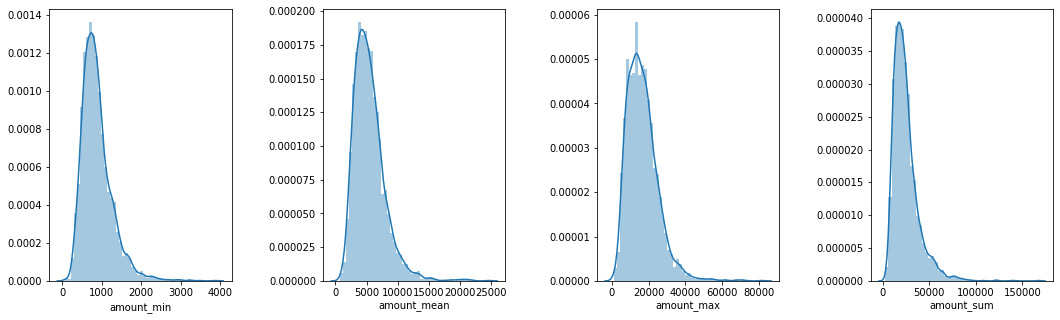

In [54]:
# Plot the Target Variables
fig, ax = plt.subplots(1, 4, figsize = (18, 5), squeeze=False)
fig.subplots_adjust(wspace=0.5)

sns.distplot(df_super['amount_min'], label=race, hist=True, kde=True, ax=ax[0][0])
sns.distplot(df_super['amount_mean'], label=race, hist=True, kde=True, ax=ax[0][1])
sns.distplot(df_super['amount_max'], label=race, hist=True, kde=True, ax=ax[0][2])
sns.distplot(df_super['amount_sum'], label=race, hist=True, kde=True, ax=ax[0][3])

# 2. Pre-Modeling and Setting Baselines

In [55]:
# Check the columns
df_super.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, fa2d818b2261e44e30628ad1ac9cc72c to 20b609609d4dbb834d722ddf29f18879
Data columns (total 43 columns):
gender                     3000 non-null object
race                       3000 non-null object
resident_status            3000 non-null object
date_of_admission_count    3000 non-null int64
days_of_admission_min      3000 non-null int64
days_of_admission_max      3000 non-null int64
days_of_admission_mean     3000 non-null float64
medical_history_1_max      3000 non-null int64
medical_history_2_max      3000 non-null int64
medical_history_3_max      3000 non-null int64
medical_history_4_max      3000 non-null int64
medical_history_5_max      3000 non-null int64
medical_history_6_max      3000 non-null int64
medical_history_7_max      3000 non-null int64
preop_medication_1_max     3000 non-null int64
preop_medication_2_max     3000 non-null int64
preop_medication_3_max     3000 non-null int64
preop_medication_4_max     3000 non

### NOTES:
- all of the fields are already numerical except for gender, race and resident status
- for preliminary modeling, can take 2 general approach:
    - 1st, utilise a decision tree model (aka random forest)
    - 2nd, use lasso and ridge regression
    - for both models, need to convert the remaining categorical values into numerical values using dummies
- models from this phase can serve as the baseline

In [56]:
df_super = pd.get_dummies(df_super)

In [57]:
df_super.columns

Index(['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'amount_min', 'amount_max', 'amount_mean',
       'amount_sum', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', '

## 2.1 Model 1 - Random Forest (4 models)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Prepare the Target Variables
y_min = df_super['amount_min']
y_max = df_super['amount_max']
y_avg = df_super['amount_mean']
y_sum = df_super['amount_sum']

# Prepare the Independent Variables
x = df_super[['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', 'race_Malay', 'race_Others', 'resident_status_Foreigner',
       'resident_status_PR', 'resident_status_Singaporean']]

In [60]:
# Save the Column Names
list_columns = ['date_of_admission_count', 'days_of_admission_min',
       'days_of_admission_max', 'days_of_admission_mean',
       'medical_history_1_max', 'medical_history_2_max',
       'medical_history_3_max', 'medical_history_4_max',
       'medical_history_5_max', 'medical_history_6_max',
       'medical_history_7_max', 'preop_medication_1_max',
       'preop_medication_2_max', 'preop_medication_3_max',
       'preop_medication_4_max', 'preop_medication_5_max',
       'preop_medication_6_max', 'symptom_1_max', 'symptom_2_max',
       'symptom_3_max', 'symptom_4_max', 'symptom_5_max', 'lab_result_1_min',
       'lab_result_1_max', 'lab_result_1_mean', 'lab_result_2_min',
       'lab_result_2_max', 'lab_result_2_mean', 'lab_result_3_min',
       'lab_result_3_max', 'lab_result_3_mean', 'weight_min', 'weight_max',
       'weight_mean', 'height_mean', 'age', 'gender_Female', 'gender_Male', 'race_Chinese',
       'race_Indian', 'race_Malay', 'race_Others', 'resident_status_Foreigner',
       'resident_status_PR', 'resident_status_Singaporean']

In [61]:
# Split the Data (Min Amount)
x_train, x_test, y_train_min, y_test_min = train_test_split(x, y_min, test_size=0.2, random_state=42)

# Train and Predict
rf_min = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_min.fit(x_train, y_train_min)

rf_min.score(x_test, y_test_min)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.6804523943178626

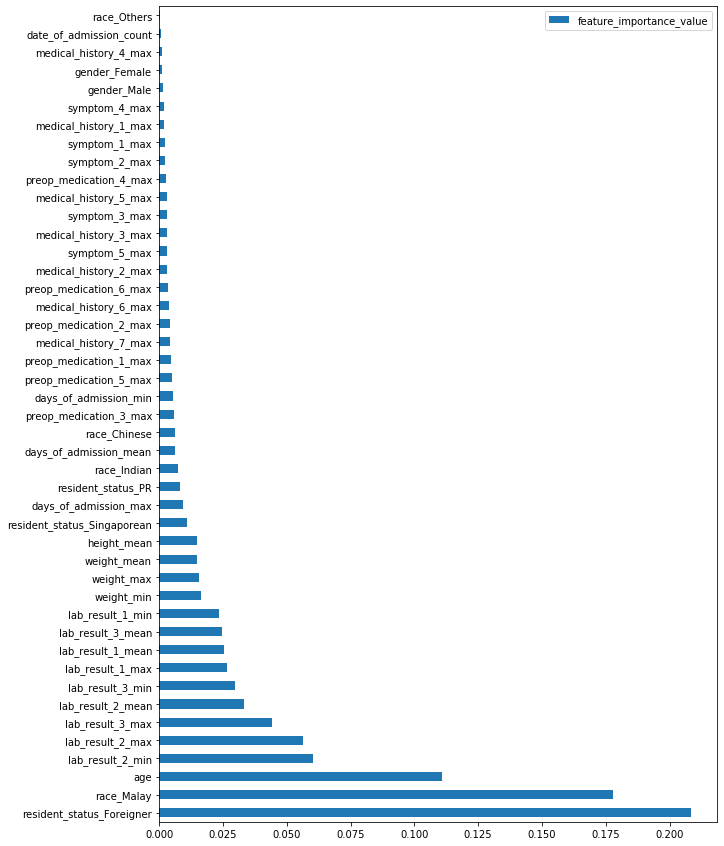

In [76]:
df_features_min = pd.DataFrame(columns=list_columns, data=rf_min.feature_importances_.reshape(1,-1)).T
df_features_min.columns = ['feature_importance_value']
df_features_min.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [64]:
df_features_min.columns

Index(['feature_importance_value'], dtype='object')

In [65]:
# Split the Data (Max Amount)
x_train, x_test, y_train_max, y_test_max = train_test_split(x, y_max, test_size=0.2, random_state=42)

# Train and Predict
rf_max = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_max.fit(x_train, y_train_max)

rf_max.score(x_test, y_test_max)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9032383768188467

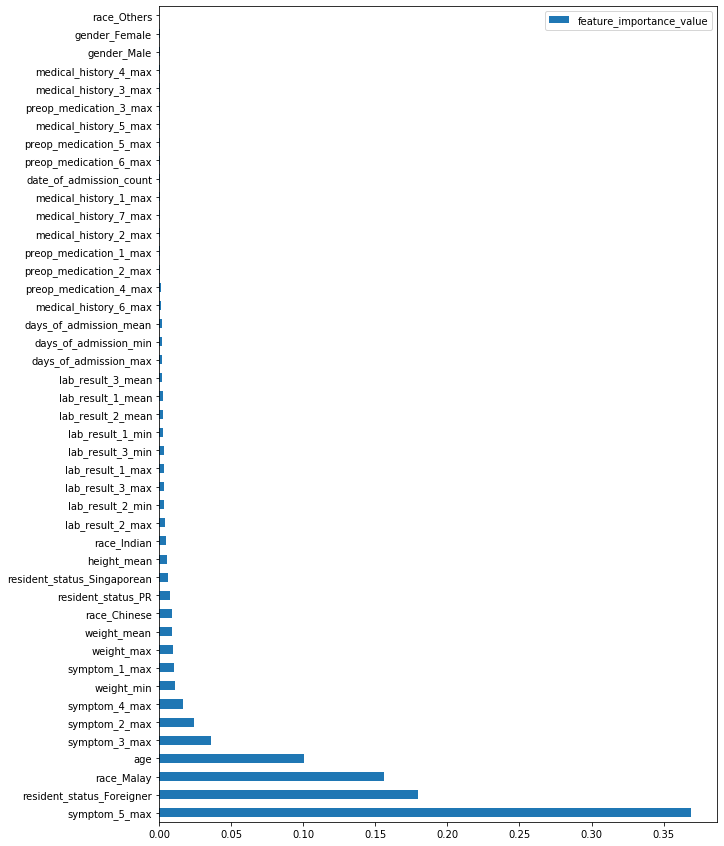

In [77]:
df_features_max = pd.DataFrame(columns=list_columns, data=rf_max.feature_importances_.reshape(1,-1)).T
df_features_max.columns = ['feature_importance_value']
df_features_max.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [67]:
# Split the Data (Mean Amount)
x_train, x_test, y_train_avg, y_test_avg = train_test_split(x, y_avg, test_size=0.2, random_state=42)

# Train and Predict
rf_avg = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_avg.fit(x_train, y_train_avg)

rf_avg.score(x_test, y_test_avg)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8128324003400361

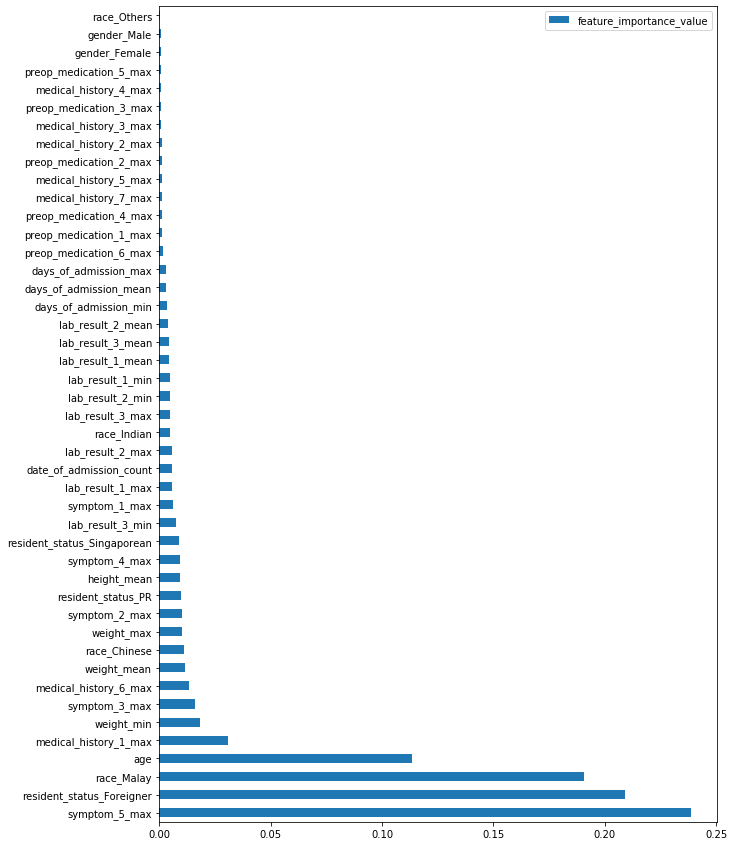

In [78]:
df_features_avg = pd.DataFrame(columns=list_columns, data=rf_avg.feature_importances_.reshape(1,-1)).T
df_features_avg.columns = ['feature_importance_value']
df_features_avg.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

In [69]:
# Split the Data (Total Amount)
x_train, x_test, y_train_sum, y_test_sum = train_test_split(x, y_sum, test_size=0.2, random_state=42)

# Train and Predict
rf_sum = RandomForestRegressor(n_estimators=100, n_jobs=-1, verbose=1)
rf_sum.fit(x_train, y_train_sum)

rf_sum.score(x_test, y_test_sum)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8471630593289788

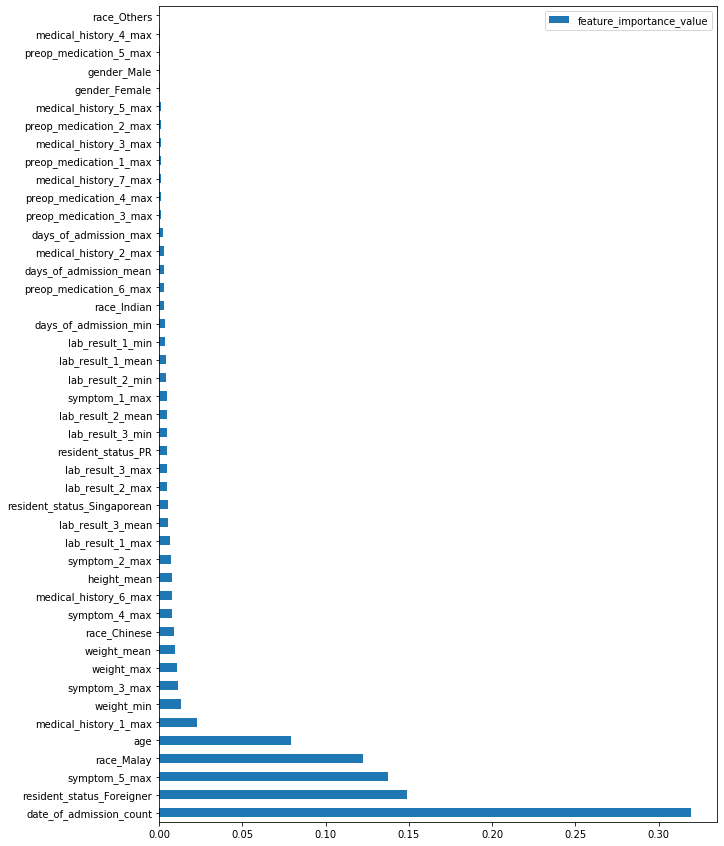

In [79]:
df_features_sum = pd.DataFrame(columns=list_columns, data=rf_sum.feature_importances_.reshape(1,-1)).T
df_features_sum.columns = ['feature_importance_value']
df_features_sum.sort_values(by='feature_importance_value', ascending=False).plot(kind='barh', figsize=(10,15))

NOTES:
- among the target variables, the minimum amount is the least in terms of prediction
- criterion used is rmse
- refer to feature importance, not necessarily an indication of features unlike coefficients from lasso or ridge but this should give us a good feel for each
- looking at the feature importances for 4 models, there is a pattern, age, malay race and foreigners seems to be an important factor for higher cost

## 2.2 Model 2 - Ridge(4 models)

In [83]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [87]:
ridge_min = Ridge(alpha=0.1, normalize=True)
ridge_min.fit(x_train,y_train_min)
pred_min = ridge_min.predict(x_test)

mean_min = mean_squared_error(y_test_min, pred_min) 
rmse_min = np.sqrt(mean_squared_error(y_test_min,pred_min))
rmse_min

241.1853175794675

In [90]:
ridge_mean = Ridge(alpha=0.1, normalize=True)
ridge_mean.fit(x_train,y_train_avg)
pred_mean = ridge_min.predict(x_test)

mean_mean = mean_squared_error(y_test_avg, pred_mean) 
rmse_mean = np.sqrt(mean_squared_error(y_test_avg,pred_mean))
rmse_mean

4973.46557176722

In [91]:
ridge_max = Ridge(alpha=0.1, normalize=True)
ridge_max.fit(x_train,y_train_max)
pred_max = ridge_max.predict(x_test)

mean_max = mean_squared_error(y_test_max, pred_max) 
rmse_max = np.sqrt(mean_squared_error(y_test_max,pred_max))
rmse_max

2073.5260761169734

In [92]:
ridge_sum = Ridge(alpha=0.1, normalize=True)
ridge_sum.fit(x_train,y_train_sum)
pred_sum = ridge_min.predict(x_test)

mean_sum = mean_squared_error(y_test_sum, pred_sum) 
rmse_sum = np.sqrt(mean_squared_error(y_test_sum,pred_sum))
rmse_sum

25875.267096501877

Additional things to do if there is more time:
- re-evaluation of the models plus lasso
- hyper parameter tuning
- statistical tests
- more analysis and graphs